<a href="https://colab.research.google.com/github/AugustoSchelske/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Ciudadanía y Participación', 'Artes']

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Sofia', 'Lucas', 'Mateo', 'Martina', 'Emma', 'Benjamín']
  apellidos = ['Gómez', 'Rodríguez', 'Pérez', 'López', 'García', 'Martínez', 'González', 'Sánchez', 'Romero', 'Fernández']
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear un DataFrame vacío
df = pd.DataFrame(columns=['Apellido y Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Generar 100 filas de datos aleatorios
for i in range(100):
  nombre = generar_nombre()
  dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = np.random.randint(1, 11)  # Notas del 1 al 10
  nota2 = np.random.randint(1, 11)
  nota3 = np.random.randint(1, 11)
  faltas = np.random.randint(0, 20)  # Faltas hasta 20

  nueva_fila = pd.DataFrame({
      'Apellido y Nombre': [nombre],
      'Nro_DNI': [dni],
      'Materia Escolar': [materia],
      'Nota 1er Trimestre': [nota1],
      'Nota 2do Trimestre': [nota2],
      'Nota 3er Trimestre': [nota3],
      'Faltas a clases': [faltas]
  })
  df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar el DataFrame
df

,Apellido y Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Lucas Fernández,91985651,Física,5,8,1,5
1,Pedro García,65103019,Historia,6,1,7,13
2,Mateo Martínez,38007330,Inglés,5,10,10,14
3,Maria Romero,25542351,Física,4,5,8,0
4,Ana Romero,72556827,Artes,4,9,2,12
...,...,...,...,...,...,...,...
95,Juan Fernández,30924889,Artes,2,3,5,14
96,Benjamín Pérez,46345310,Inglés,3,1,3,7
97,Benjamín Sánchez,99562135,Inglés,10,6,1,13
98,Ana Martínez,28717675,Geografía,9,3,5,18


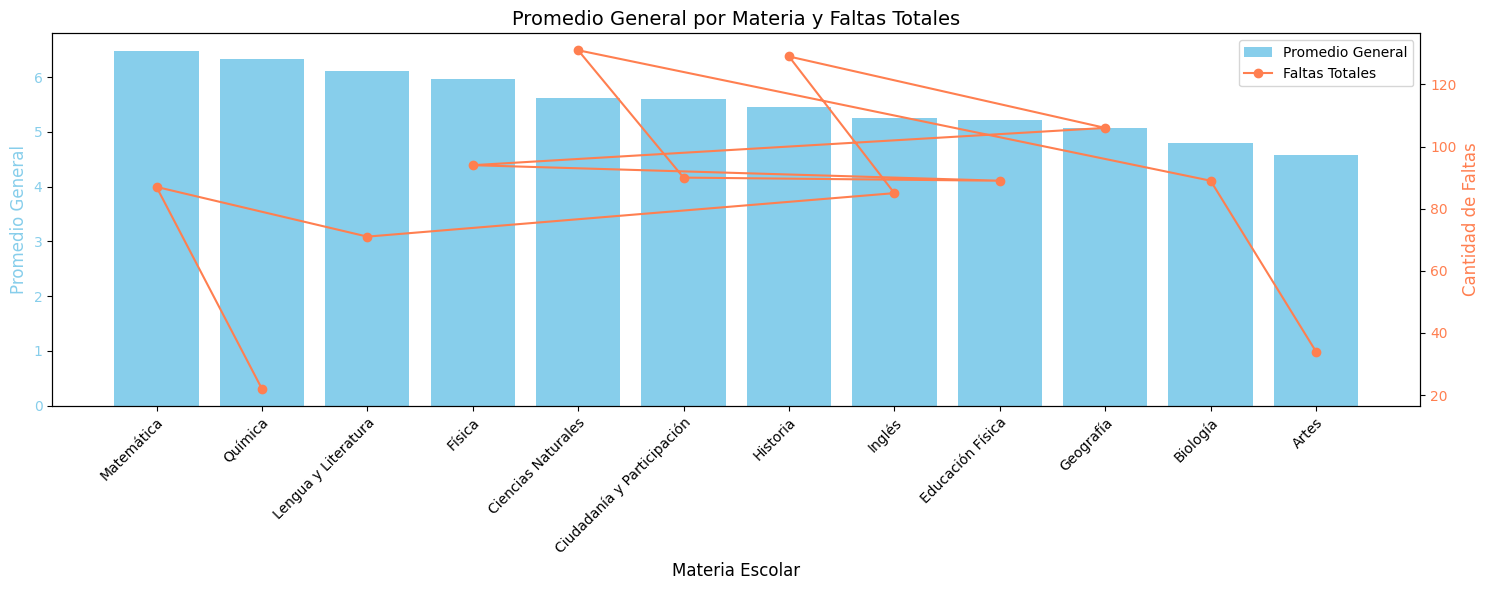

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_materias_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(111)

# Barras de promedios
ax1.bar(promedios_materias_ordenados.index, promedios_materias_ordenados.values, label='Promedio General', color='skyblue')
ax1.set_xlabel('Materia Escolar', fontsize=12)
ax1.set_ylabel('Promedio General', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas Totales', fontsize=14)

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, marker='o', color='coral', label='Faltas Totales')
ax2.set_ylabel('Cantidad de Faltas', color='coral', fontsize=12)
ax2.tick_params(axis='y', labelcolor='coral')


# Rotar las etiquetas del eje x para mejor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Agregar leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)